In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
try:
    #plt.style.use('belle2')
    #plt.style.use('belle2_serif')
    plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

In [2]:
import os
import pandas as pd
from pandas import HDFStore
from os import path
from yaml import safe_load

from hist.get_data import get_data
from hist.bkg_stack import generic_ntuple, get_data_in_module
from read_yaml_to_dict import read_yaml_to_dict
from src.sample_name import sample_name
from src.combine_cuts import combine_cuts
print(os.getcwd())

Welcome to JupyROOT 6.26/04
For optimal usage set `plt.style.use('belle2')`
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'belle2', 'belle2_modern', 'belle2_serif', 'belle2_wg1', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
/home/jykim/workspace/DRAW/read_yaml_to_dict.py
/home/jykim/workspace/DRAW
{'Vegetables': ['Pepper', 'Tomato', 'Garlic']}
/home/jykim/workspace/DRAW


In [3]:

from hist.draw_stack import draw_stack_include_signal
from hist.draw_stack import draw_stack_except_signal,draw_stack_no_signal

In [4]:
location='lab_ssd'
option = 'train_v2'
sample_info = read_yaml_to_dict("samples")

In [5]:
sample_info

{'pid_0_5': {'ccbar': '/ccbar/pid_0_5_ccbar_recon_output_0*.root',
  'charged': '/charged/pid_0_5_charged_recon_output_0*.root',
  'mixed': '/mixed/pid_0_5_mixed_recon_output_0*.root',
  'uubar': '/uubar/pid_0_5_uubar_recon_output_0*.root',
  'ddbar': '/ddbar/pid_0_5_ddbar_recon_output_0*.root',
  'ssbar': '/ssbar/pid_0_5_ssbar_recon_output_0*.root',
  'taupair': '/taupair/pid_0_5_taupair_recon_output_0*.root'},
 'pid_0_5_no_signal': {'ccbar': '/ccbar/pid_0_5_no_signal_ccbar_recon_output_0*.root',
  'charged': '/charged/pid_0_5_charged_recon_output_0*.root',
  'mixed': '/mixed/pid_0_5_mixed_recon_output_0*.root',
  'uubar': '/uubar/pid_0_5_uubar_recon_output_0*.root',
  'ddbar': '/ddbar/pid_0_5_ddbar_recon_output_0*.root',
  'ssbar': '/ssbar/pid_0_5_ssbar_recon_output_0*.root',
  'taupair': '/taupair/pid_0_5_taupair_recon_output_0*.root'},
 'location': {'kekcc': '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg',
  'lab_nas': '/home/jykim/nas/storage/01_recon/merge_generi

In [6]:
sample_loc=sample_name(option=option, location=location, sample_info=sample_info) 
#sample_loc=sample_name(option='pid_0_5_no_signal', location=location) 
print(sample_loc )

{'ccbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/v2_extraction_no_signal_ccbar_recon_output_0*.root', 'charged': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/charged/v2_extraction_no_signal_charged_recon_output_0*.root', 'mixed': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/mixed/v2_extraction_no_signal_mixed_recon_output_0*.root', 'uubar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/uubar/v2_extraction_no_signal_uubar_recon_output_0*.root', 'ddbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ddbar/v2_extraction_no_signal_ddbar_recon_output_0*.root', 'ssbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ssbar/v2_extraction_no_signal_ssbar_recon_output_0*.root', 'taupair': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/taupair/v2_extraction_no_signal_taupair_recon_output_0*.root'}


In [7]:
List = ['phi', 'antiKstar', 'rho', 'omega']
extract_variables = "plot_variables"

In [8]:
        plot_variables = read_yaml_to_dict(extract_variables )

    

In [9]:
plot_variables

{'vars': ['D0_M',
  'Dstarp_Q',
  'D0_cosHel_0',
  'Dstarp_CMS_p',
  'gamma_E',
  'gamma_clusterSecondMoment',
  '__ncandidates__',
  '__experiment__',
  '__run__',
  '__event__',
  'Dstarp_isSignal',
  'D0_isSignal']}

In [10]:
for mode in List:
    if mode == 'phi':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        pd_phi = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'antiKstar':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        pd_antiKstar = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'rho':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        pd_rho = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'omega':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        pd_omega = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
        

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'Phi_InvM', 'D0_cosHel_0']
['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'antiKstar_InvM', 'D0_cosHel_0']
['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'Rho_InvM', 'D0_cosHel_0']
['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'D0_cosHel_2', 'Omega_InvM']


# phi

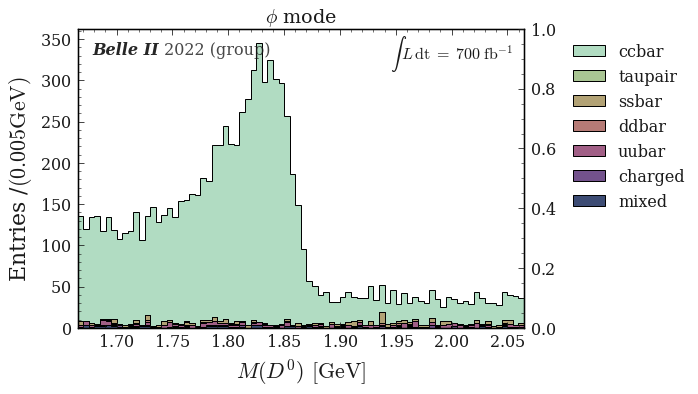

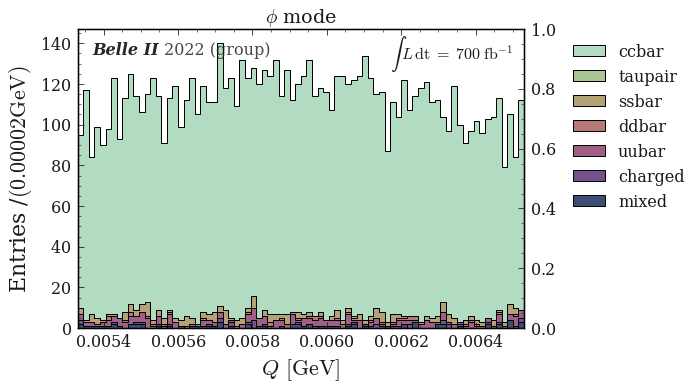

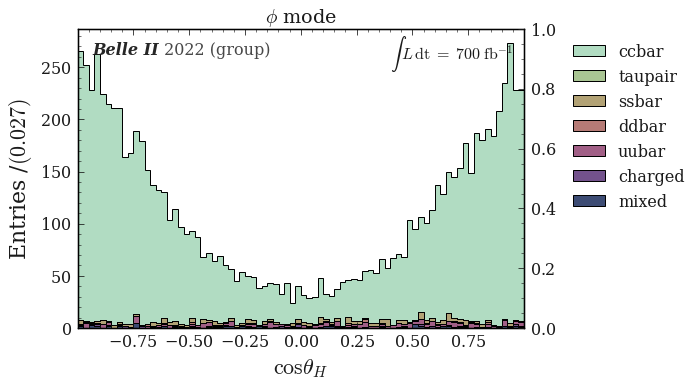

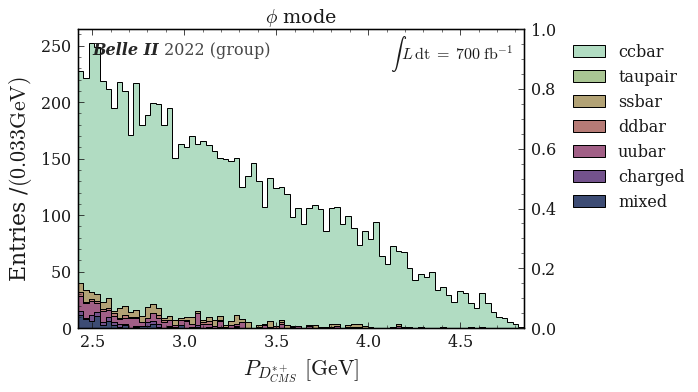

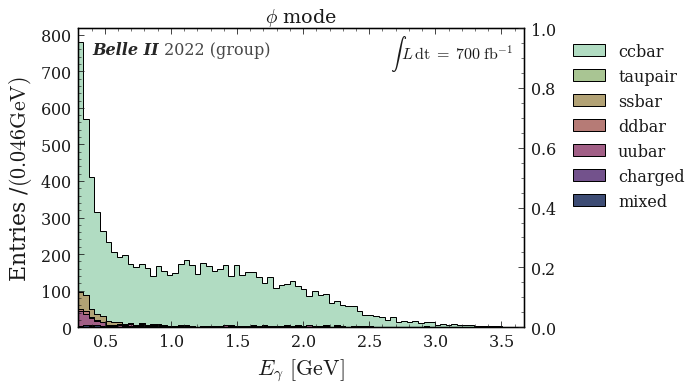

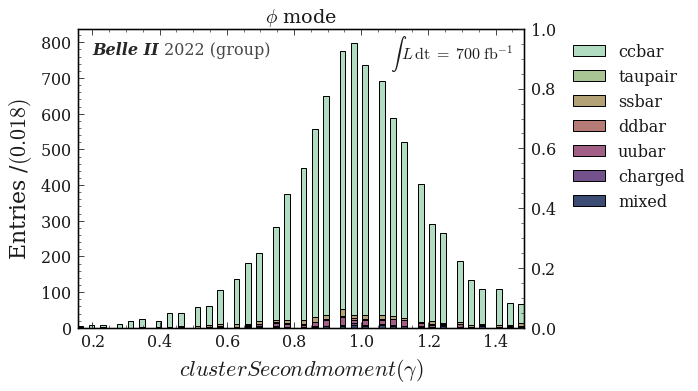

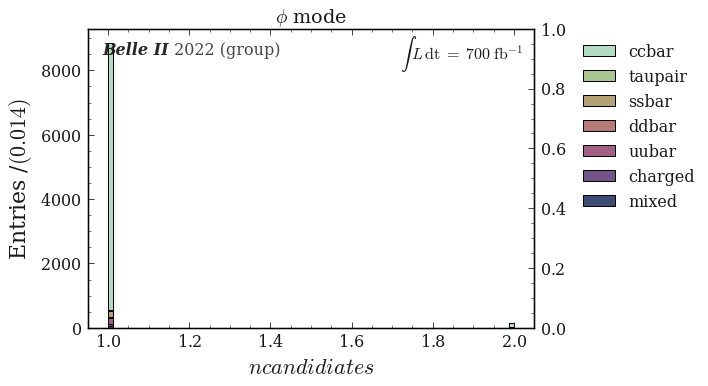

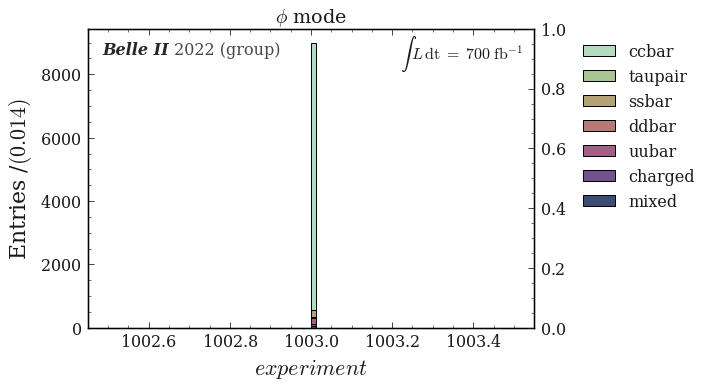

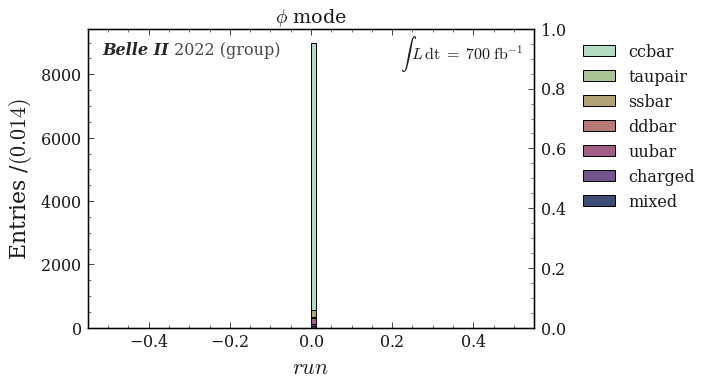

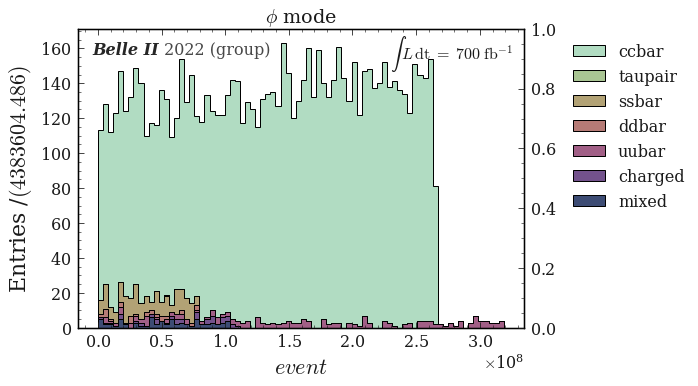

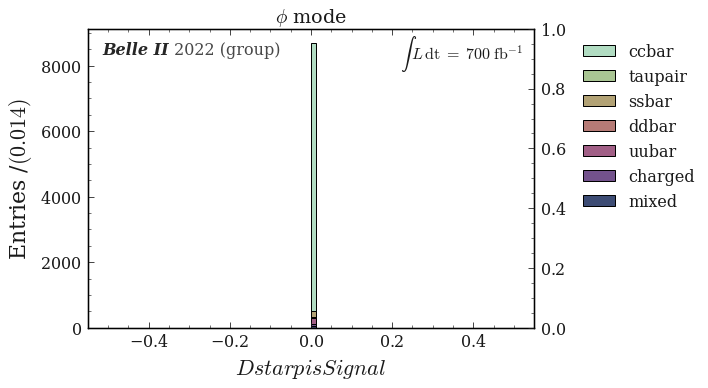

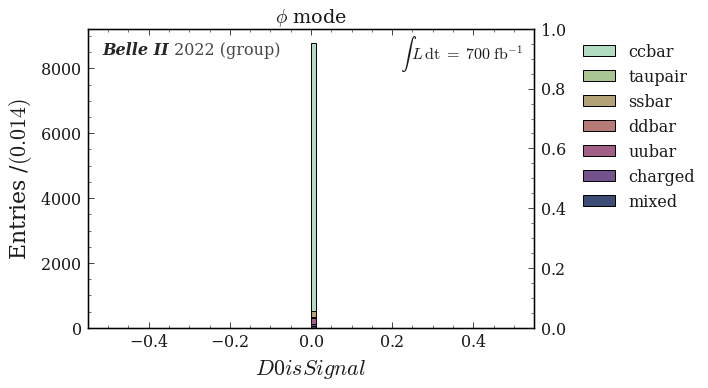

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

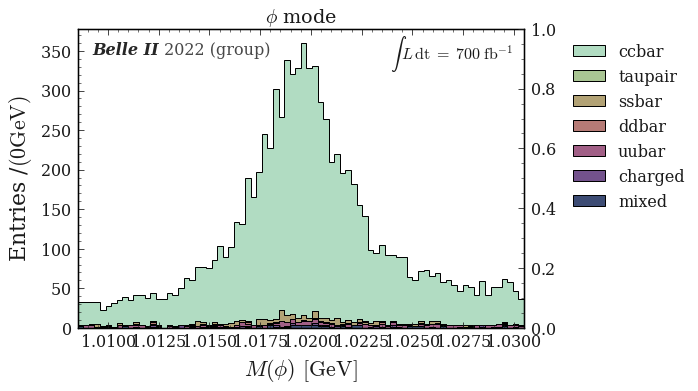

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [12]:
plot_title = r'$\phi$ mode'
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']

total_lumi="$700\; \mathrm{fb}^{-1}$"
draw_stack_no_signal(df=pd_phi,bins=80, vector='phi', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            


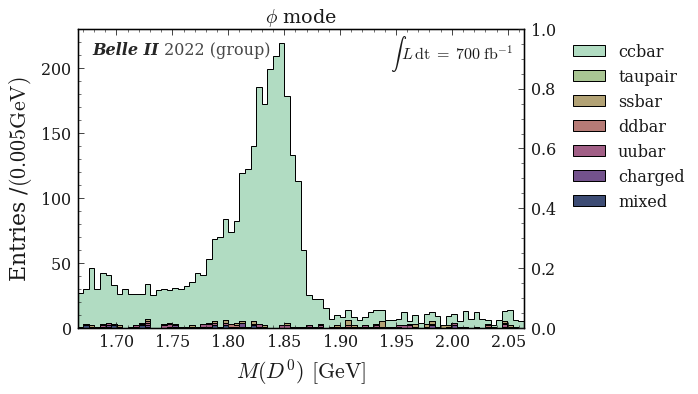

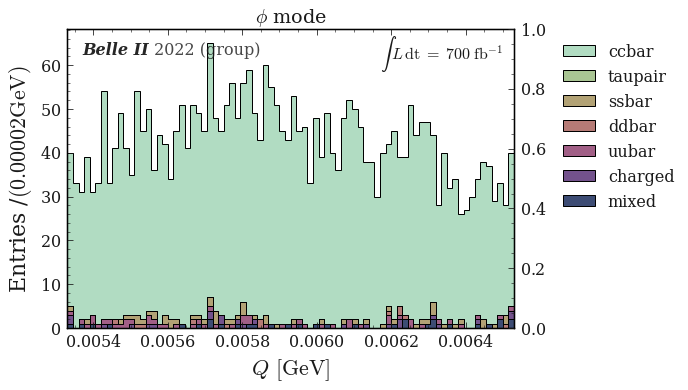

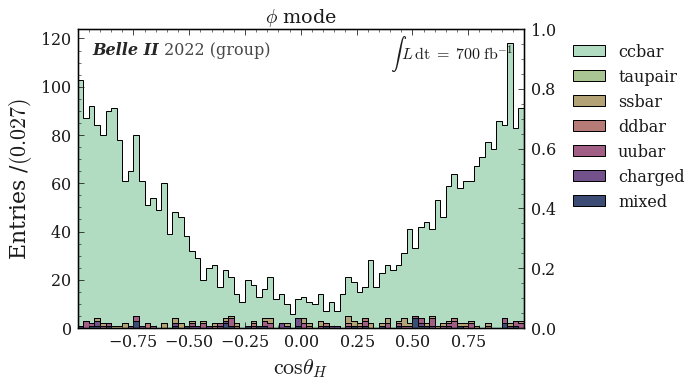

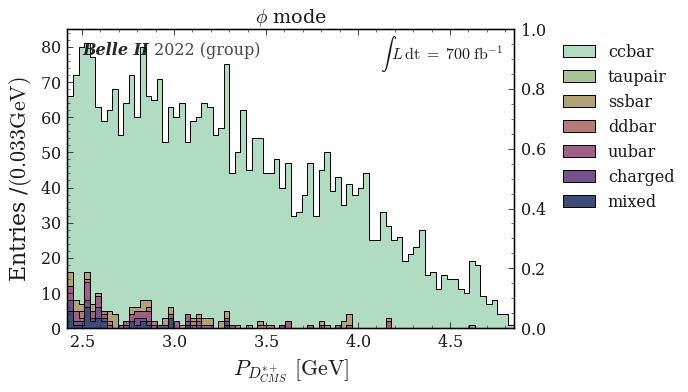

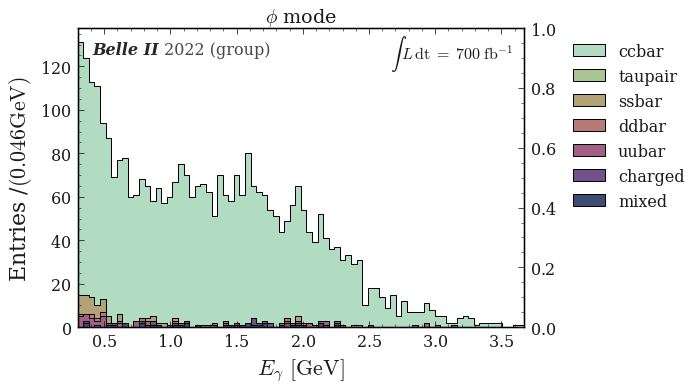

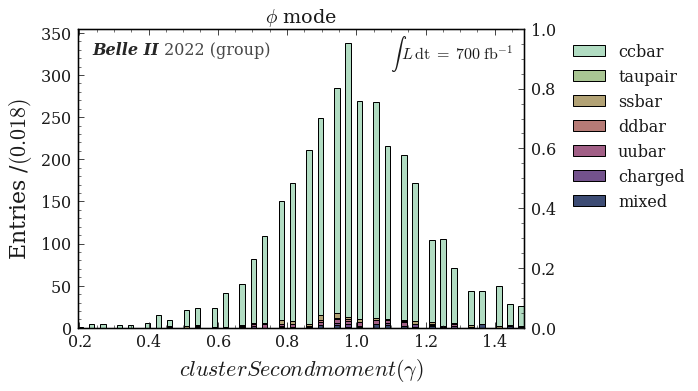

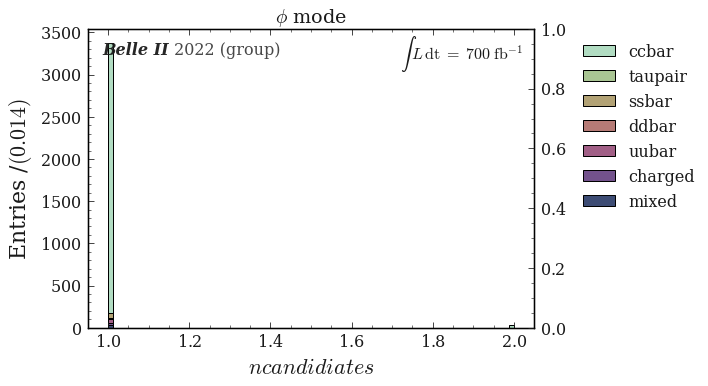

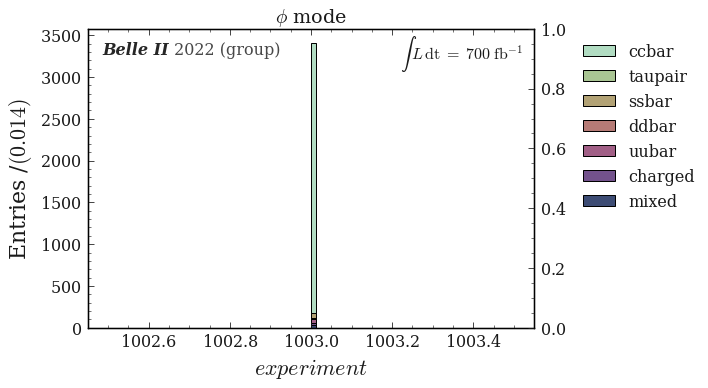

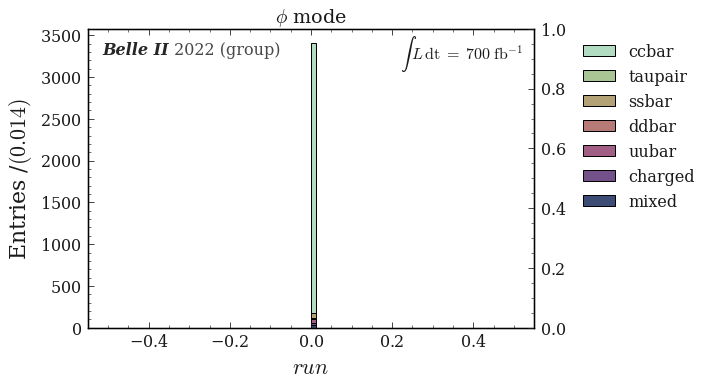

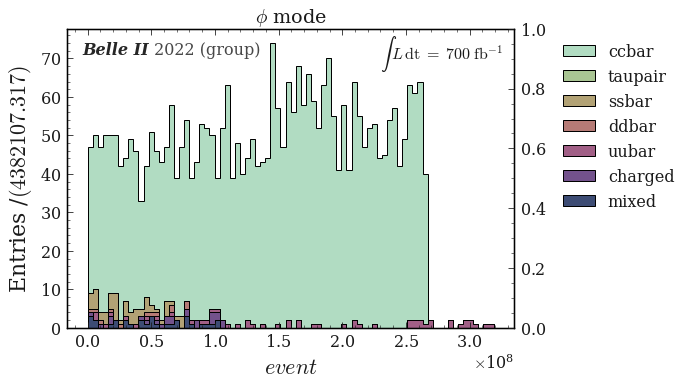

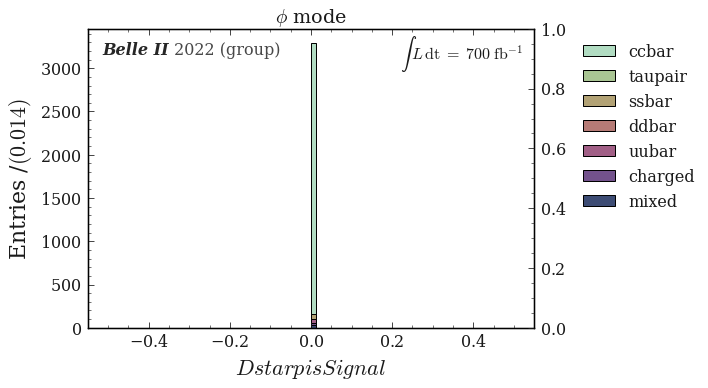

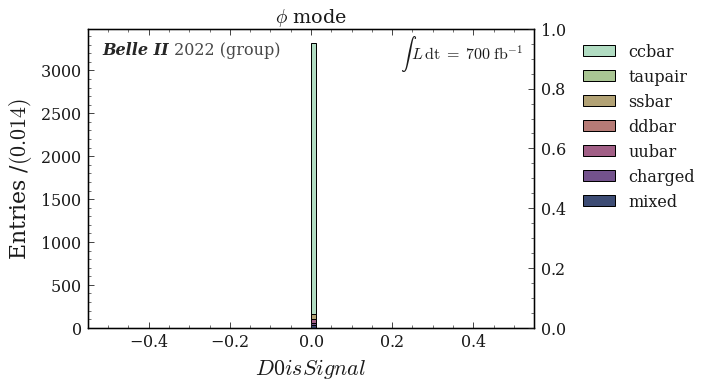

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

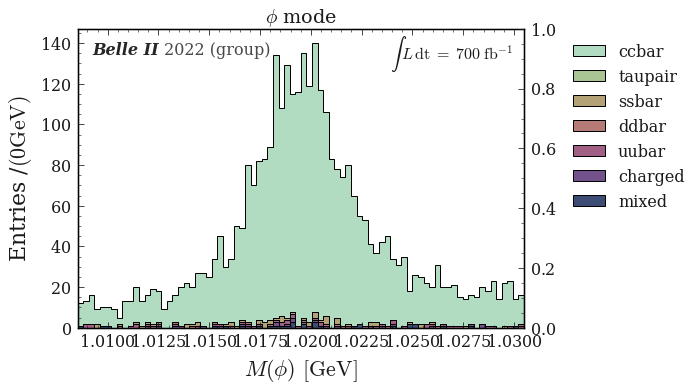

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [13]:
plot_title = r'$\phi$ mode'
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']

total_lumi="$700\; \mathrm{fb}^{-1}$"
draw_stack_no_signal(df=pd_phi[pd_phi['Pi0_Prob']<0.9],bins=80, vector='phi', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            


# rho

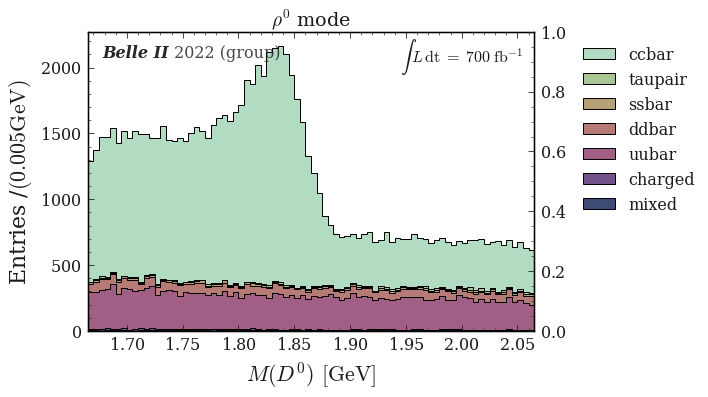

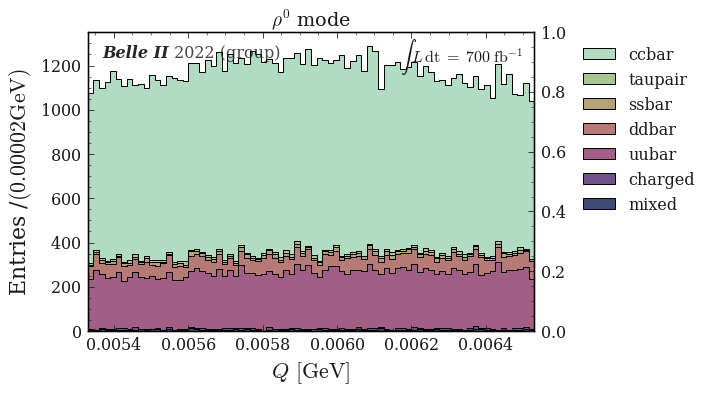

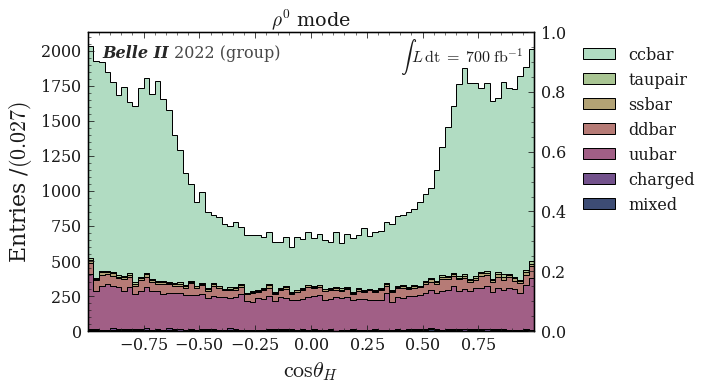

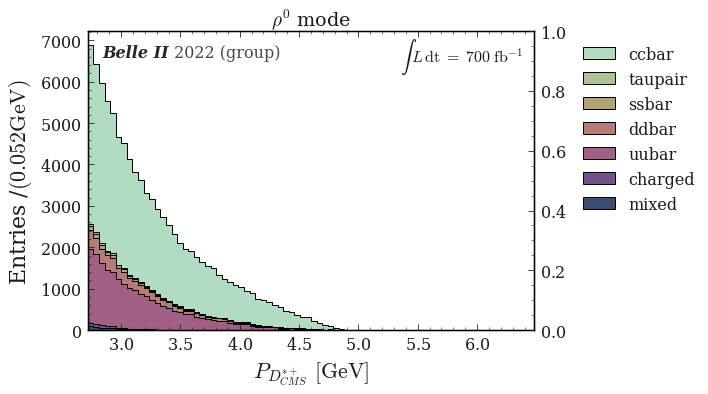

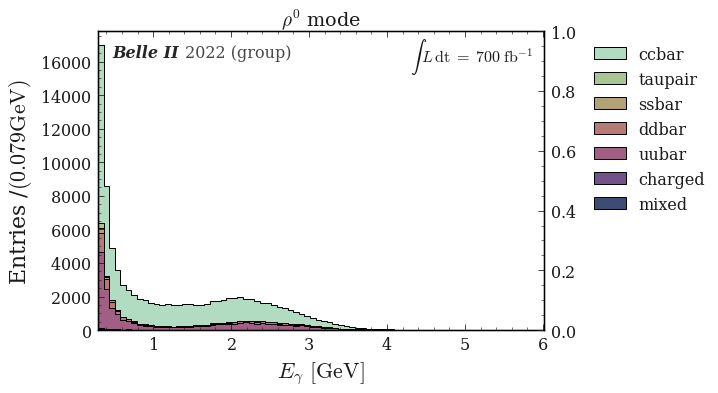

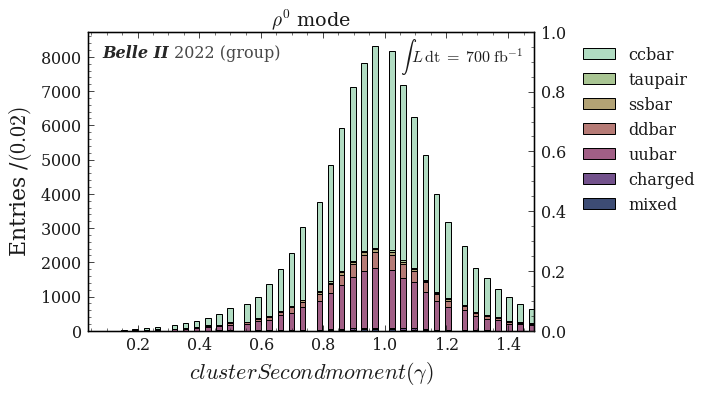

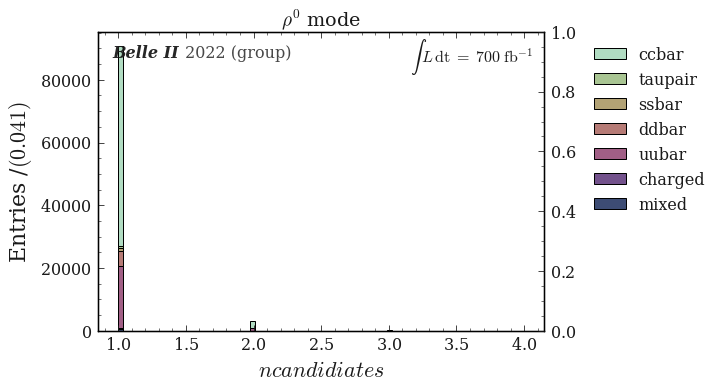

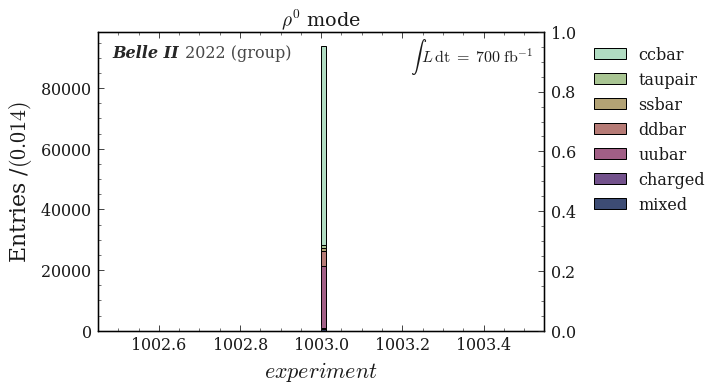

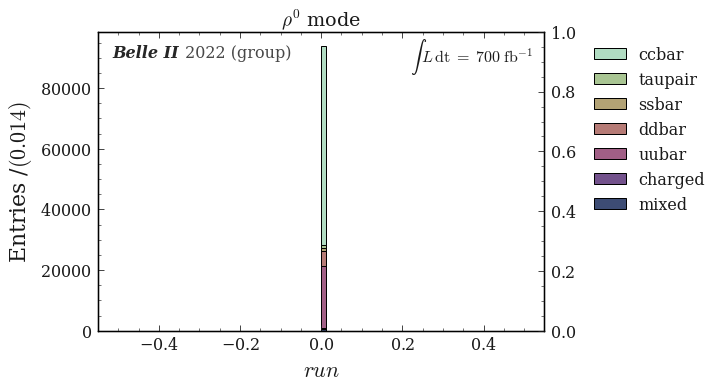

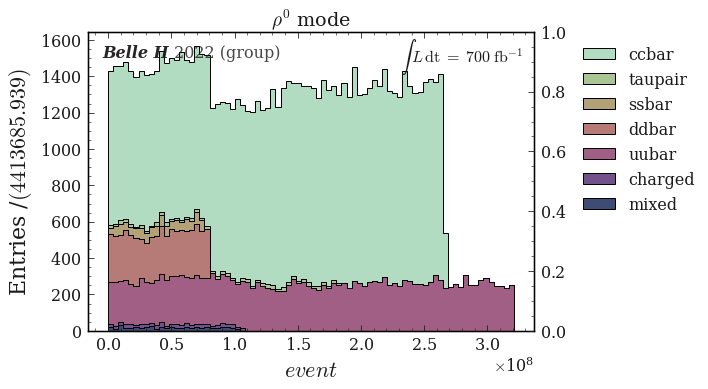

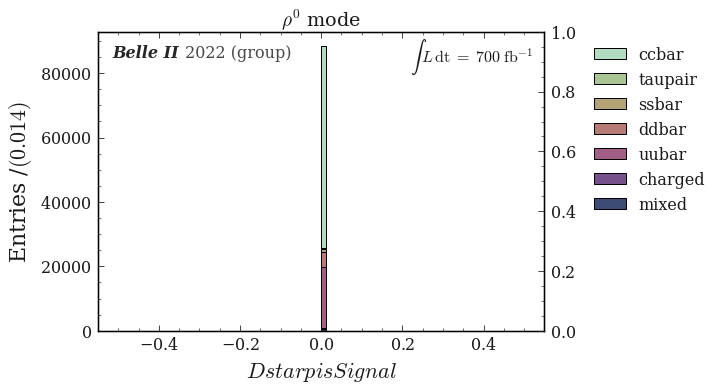

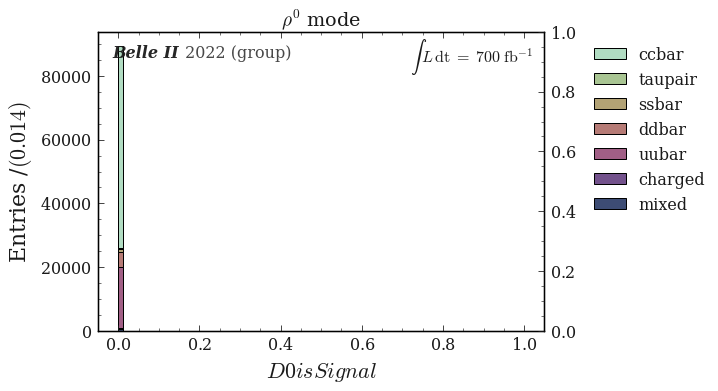

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

ValueError: 
$M(ho^0)$ $[\mathrm{GeV}]$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [14]:
plot_title = r'$\rho^0$ mode'
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']

total_lumi="$700\; \mathrm{fb}^{-1}$"
draw_stack_no_signal(df=pd_rho,bins=80, vector='rho', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            


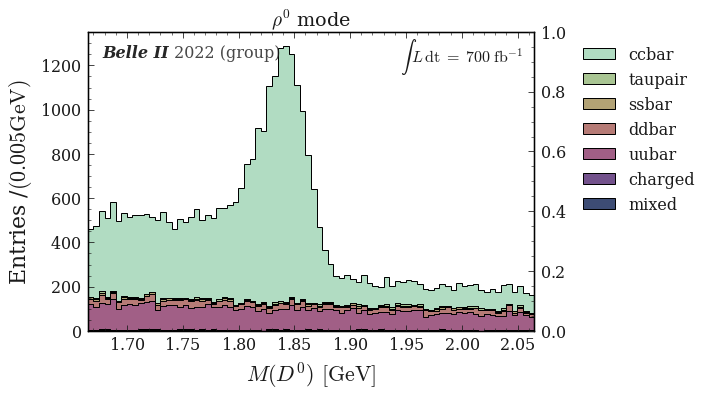

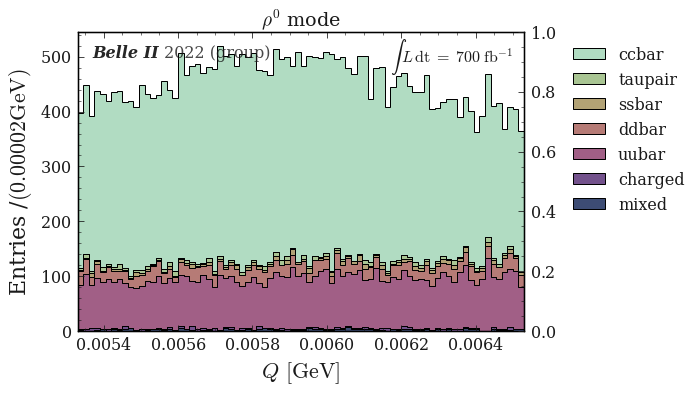

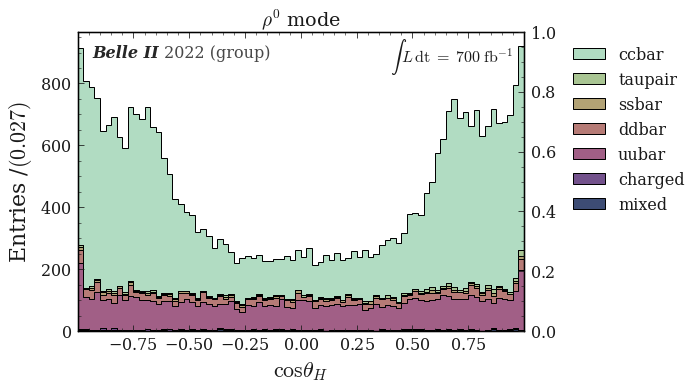

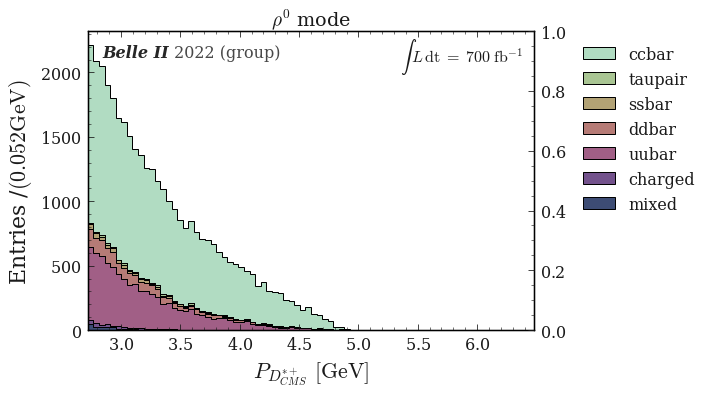

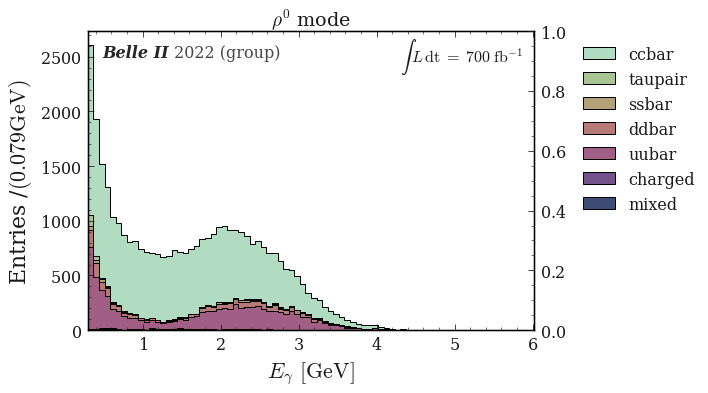

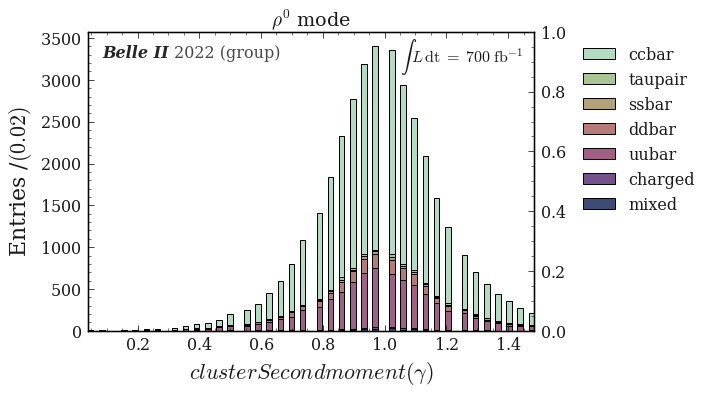

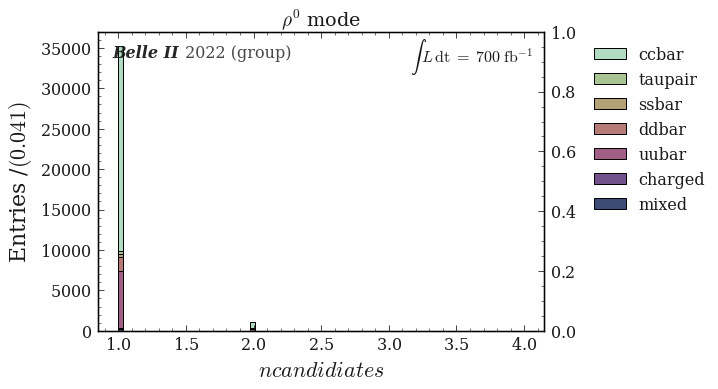

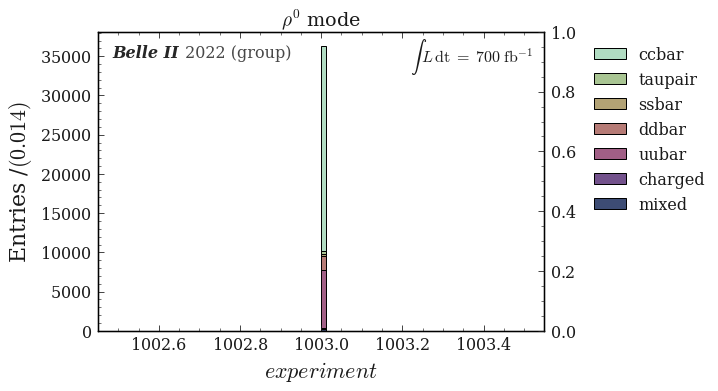

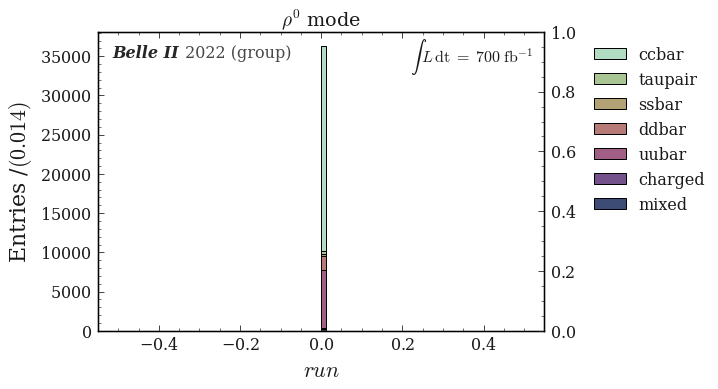

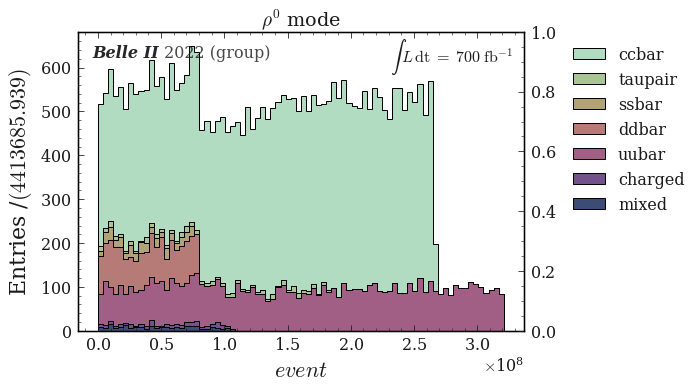

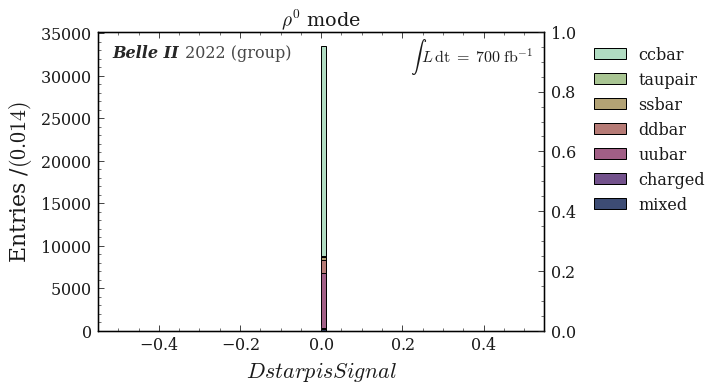

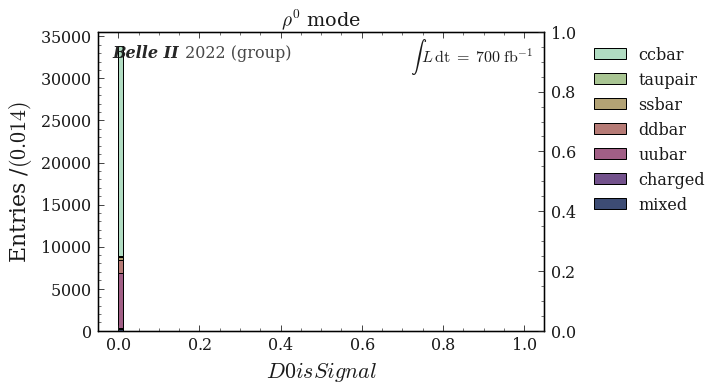

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

ValueError: 
$M(ho^0)$ $[\mathrm{GeV}]$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [39]:
plot_title = r'$\rho^0$ mode'
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']

total_lumi="$700\; \mathrm{fb}^{-1}$"
draw_stack_no_signal(df=pd_rho[pd_rho['Pi0_Prob']<0.9 ],bins=80, vector='rho', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            


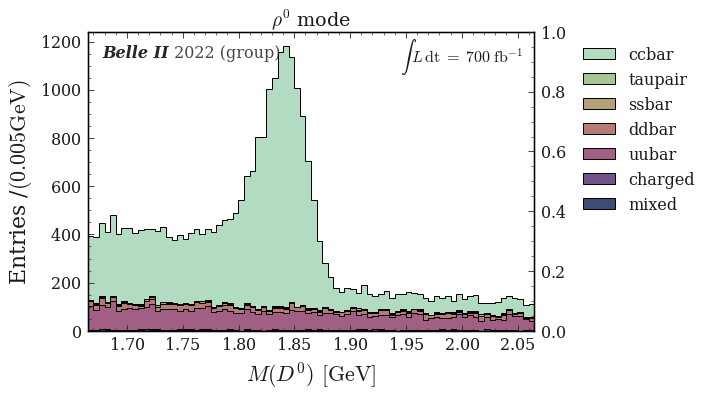

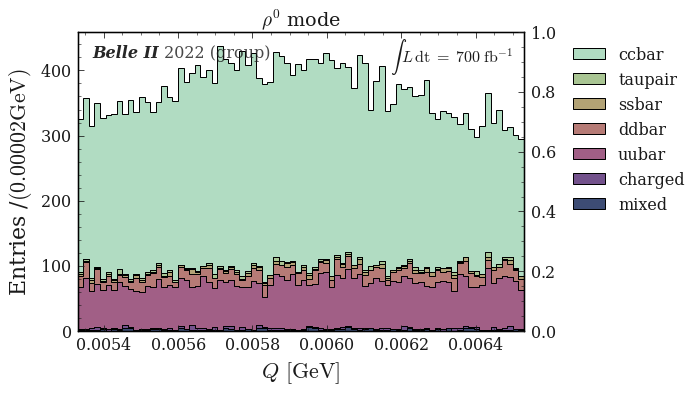

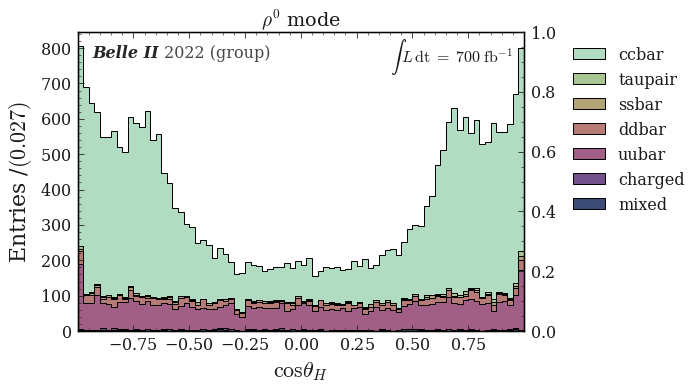

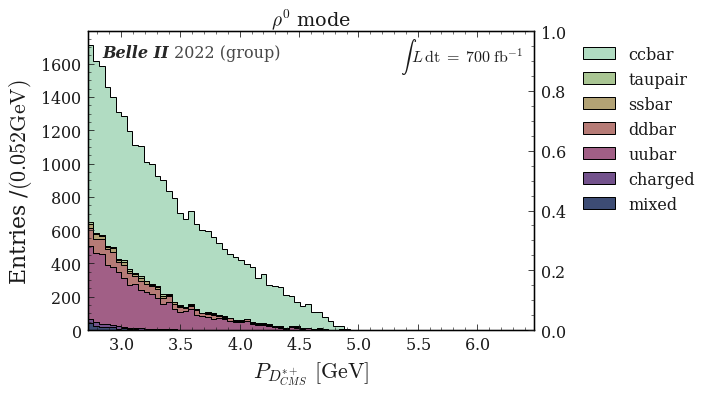

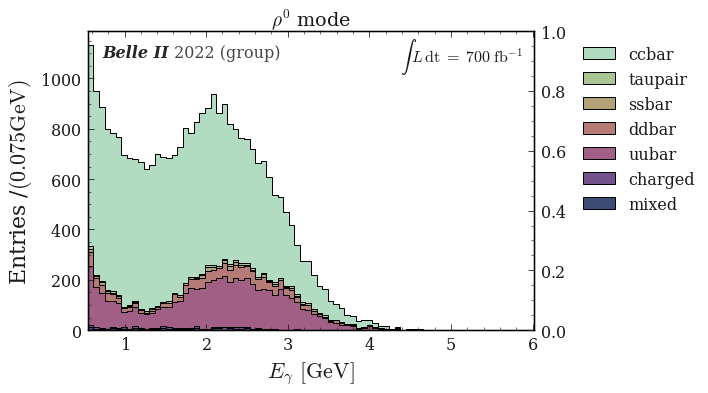

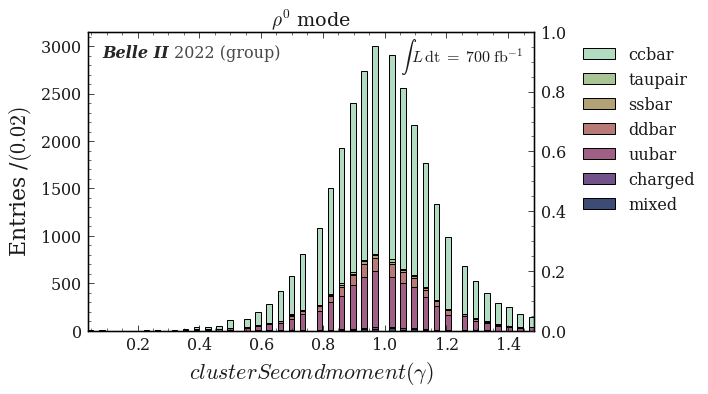

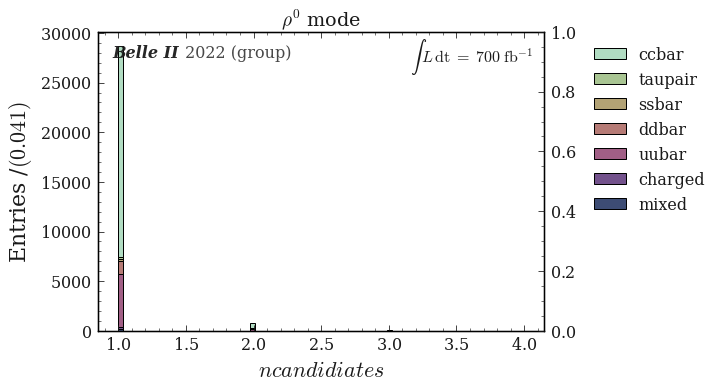

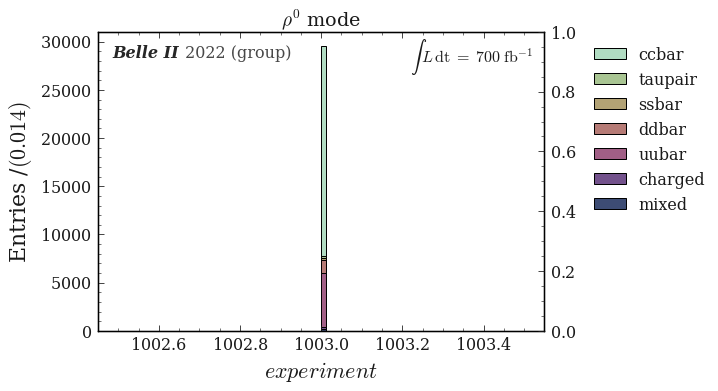

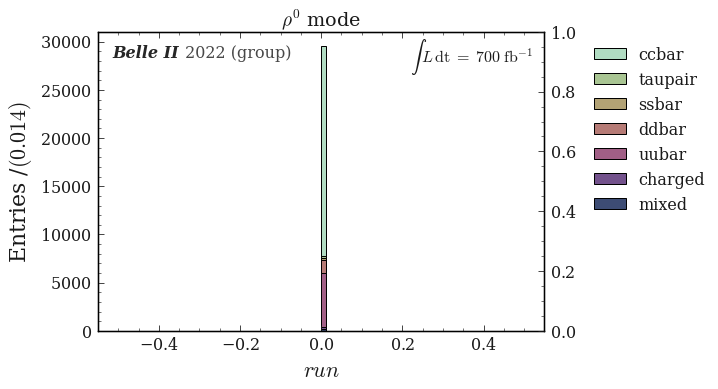

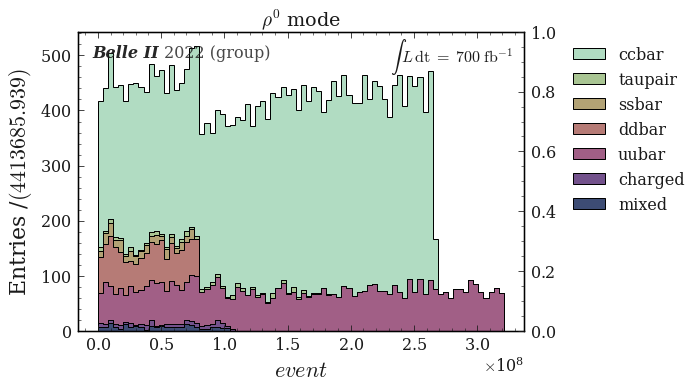

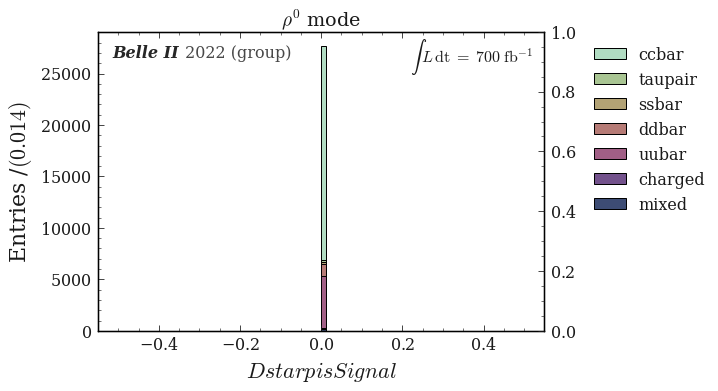

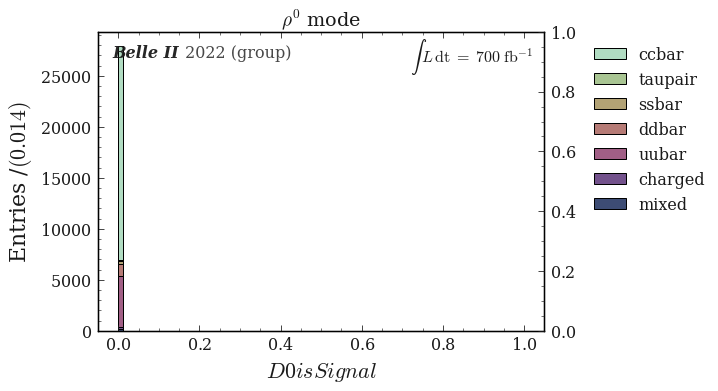

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

ValueError: 
$M(ho^0)$ $[\mathrm{GeV}]$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [52]:
plot_title = r'$\rho^0$ mode'
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']

total_lumi="$700\; \mathrm{fb}^{-1}$"
draw_stack_no_signal(df=pd_rho[(pd_rho['Pi0_Prob']<0.9) &  (pd_rho['gamma_E']>0.55) ],bins=80, vector='rho', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            


# antiKstar

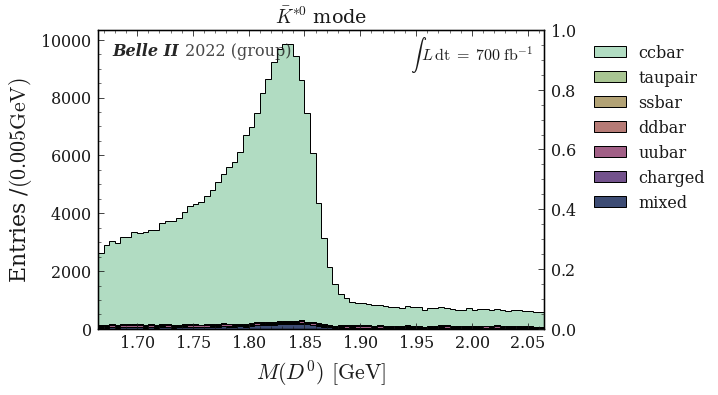

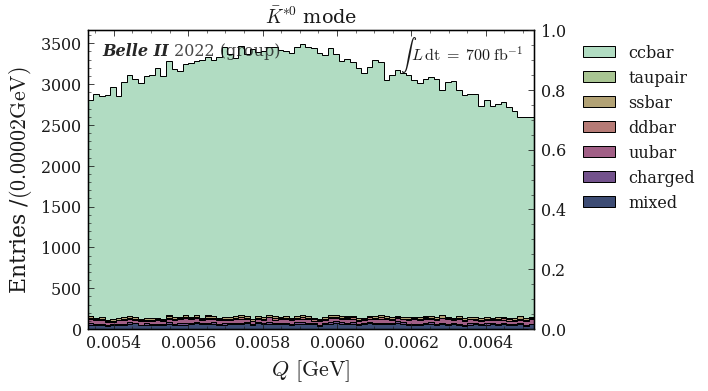

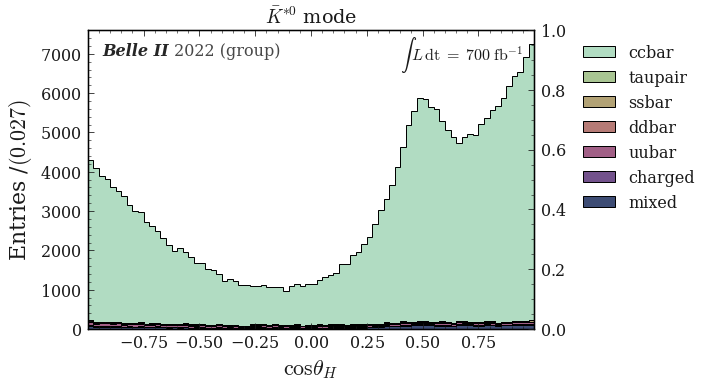

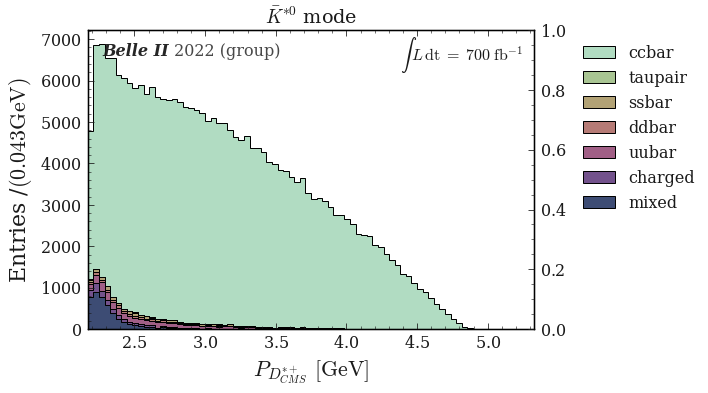

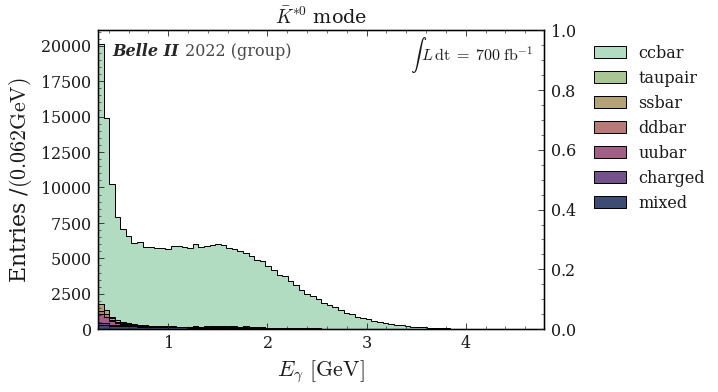

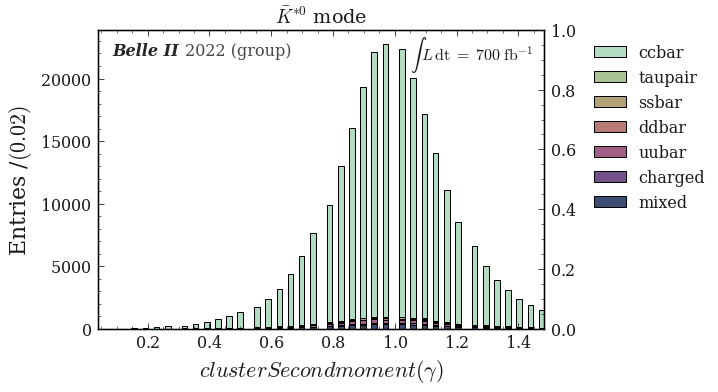

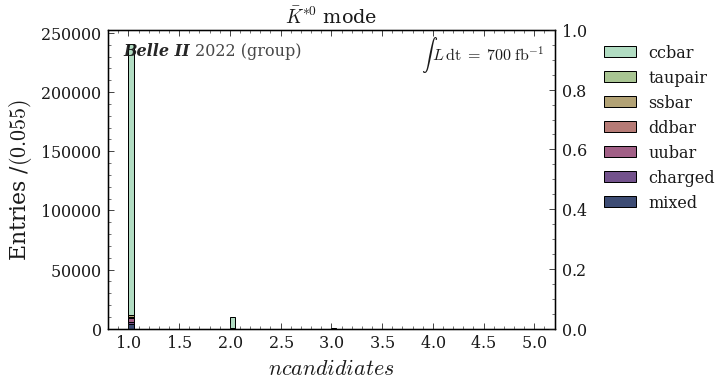

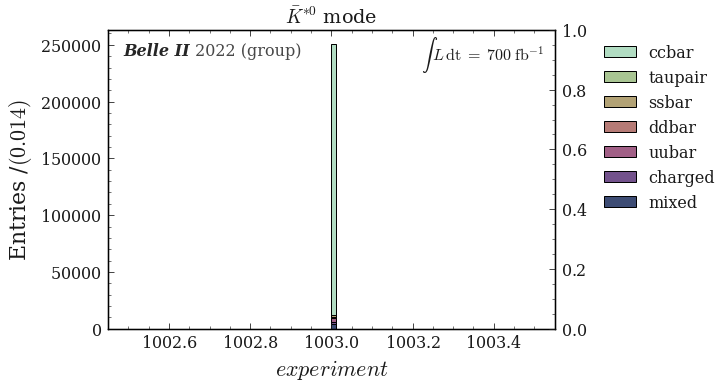

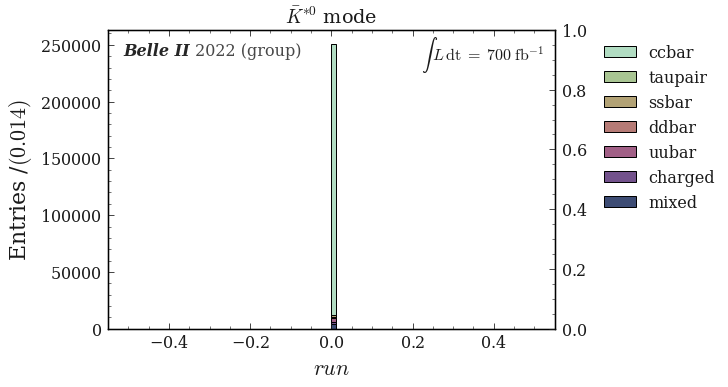

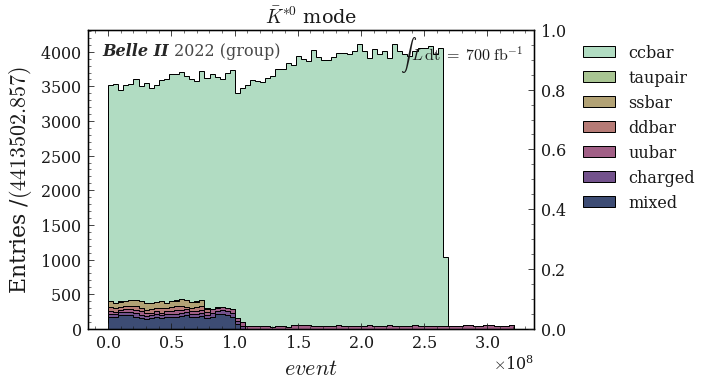

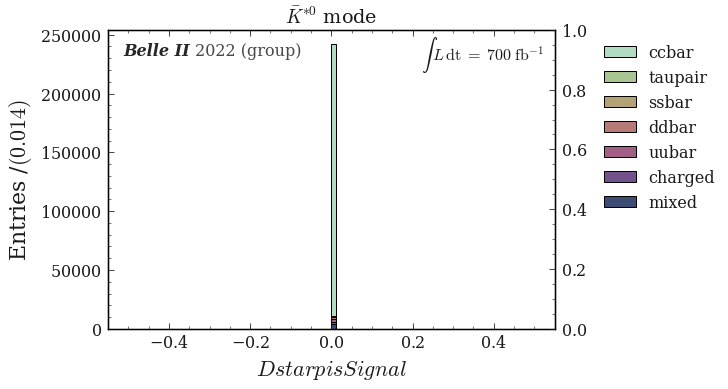

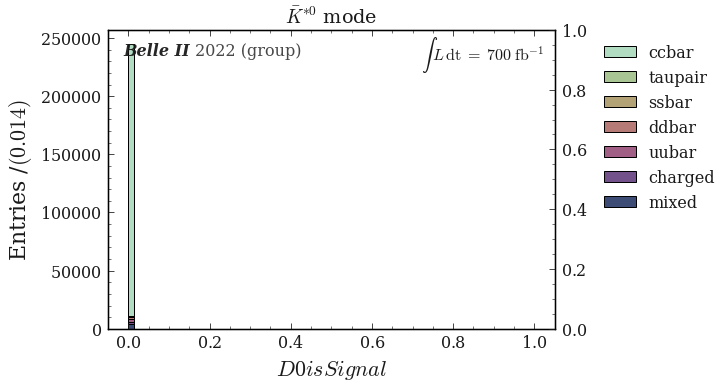

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

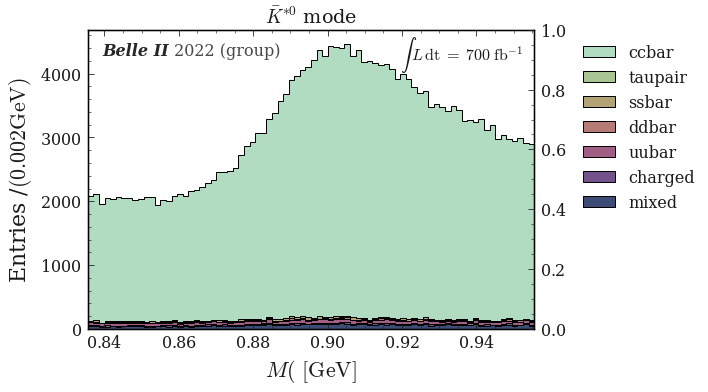

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [15]:
plot_title = r'$\bar{K}^{*0}$ mode'
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']

total_lumi="$700\; \mathrm{fb}^{-1}$"
# draw_stack_no_signal(df=pd_antiKstar[pd_antiKstar['Pi0_Prob']<0.9 ],bins=80, vector='antiKstar', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            

draw_stack_no_signal(df=pd_antiKstar[(pd_antiKstar['antiKstar_InvM']<0.89555+0.06) & (pd_antiKstar['antiKstar_InvM']>0.89555-0.06)],bins=80, vector='antiKstar', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            


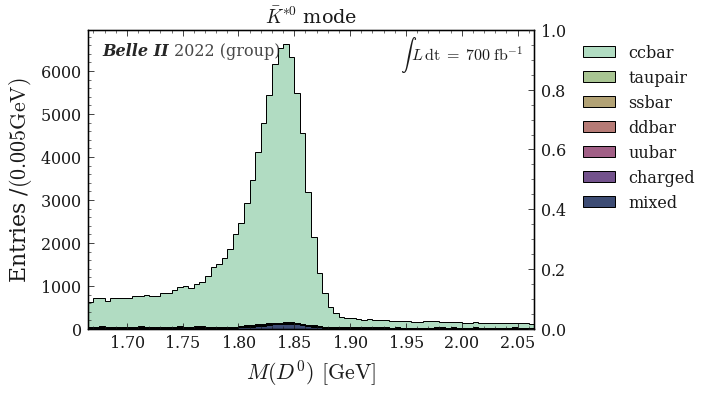

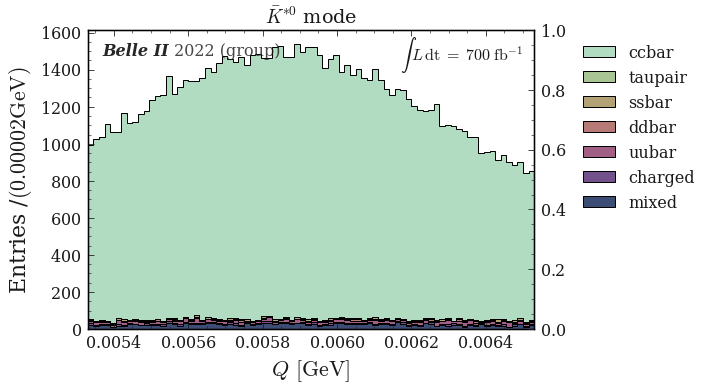

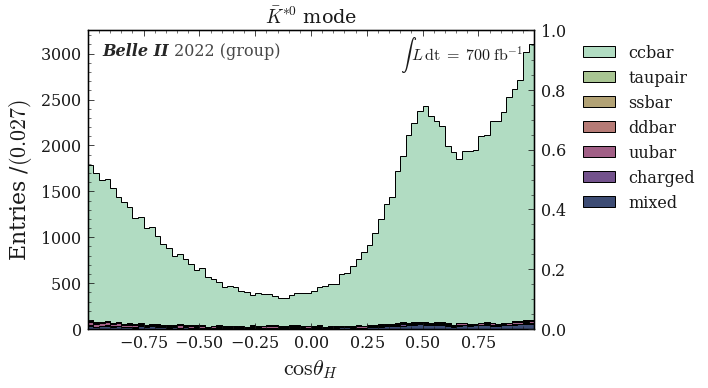

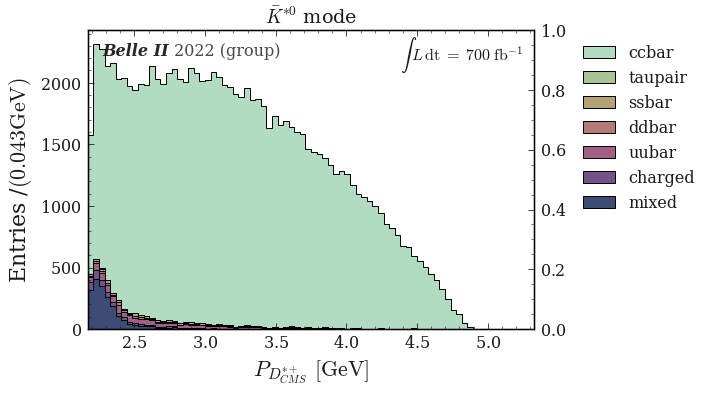

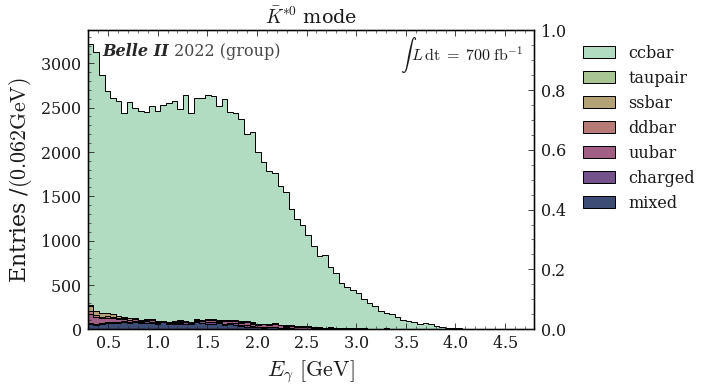

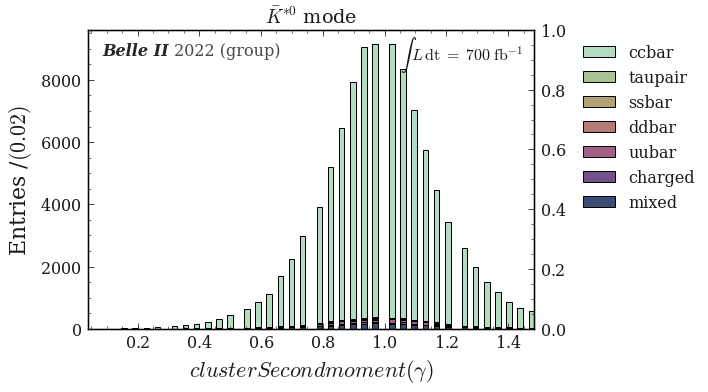

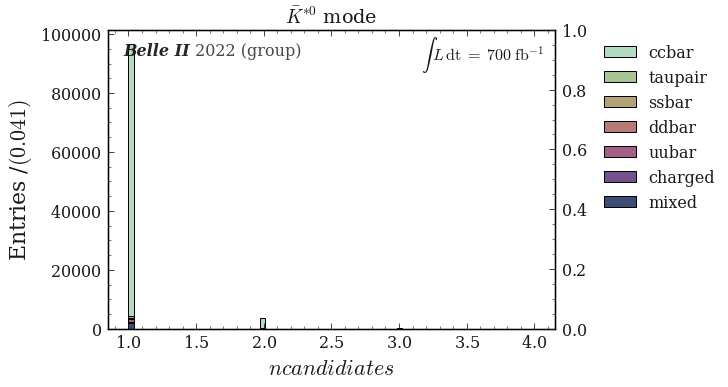

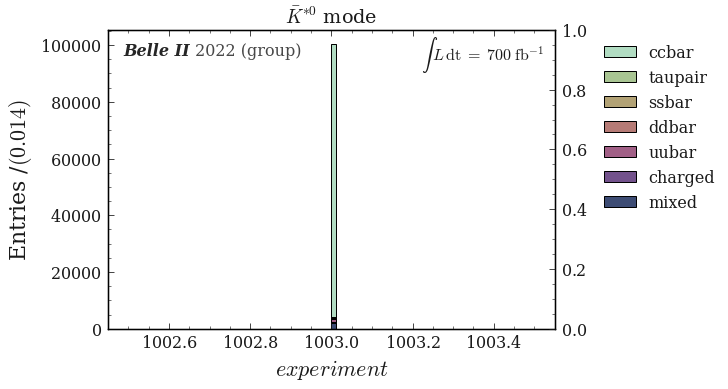

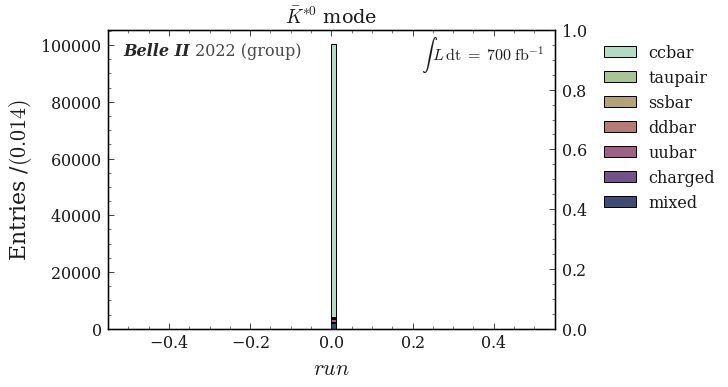

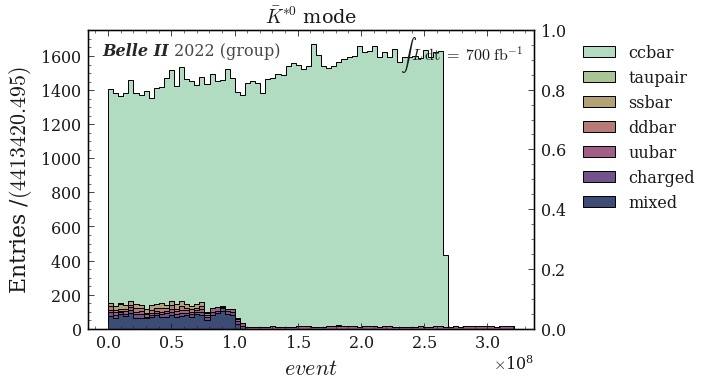

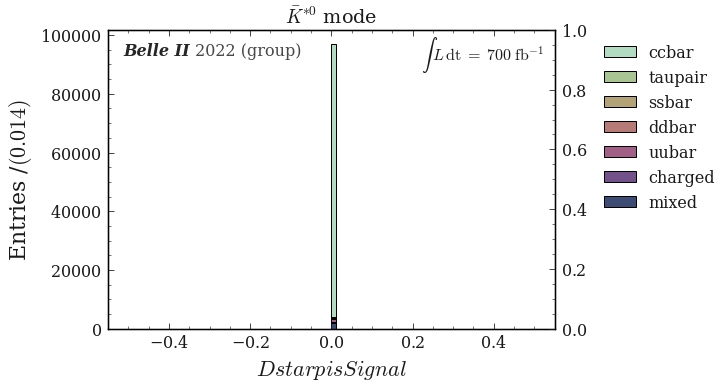

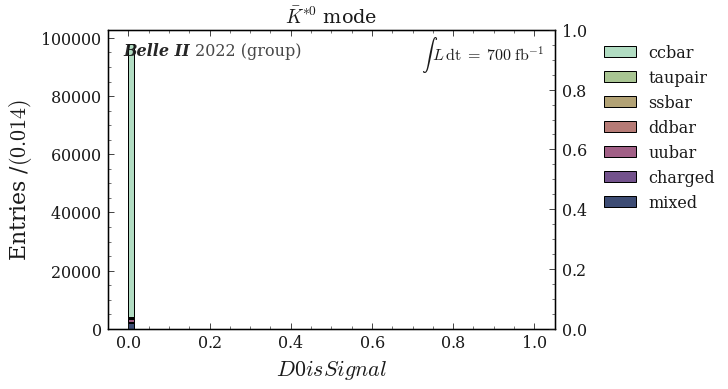

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

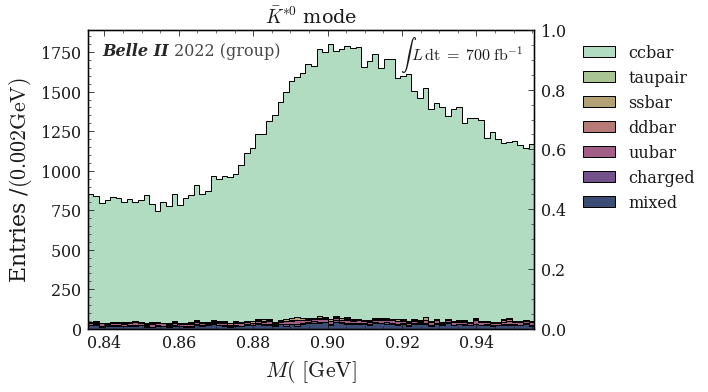

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [16]:
plot_title = r'$\bar{K}^{*0}$ mode'
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']

total_lumi="$700\; \mathrm{fb}^{-1}$"
# draw_stack_no_signal(df=pd_antiKstar[pd_antiKstar['Pi0_Prob']<0.9 ],bins=80, vector='antiKstar', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            

draw_stack_no_signal(df=pd_antiKstar[(pd_antiKstar['Pi0_Prob']<0.9) & (pd_antiKstar['antiKstar_InvM']<0.89555+0.06) & (pd_antiKstar['antiKstar_InvM']>0.89555-0.06)],bins=80, vector='antiKstar', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            


# omega

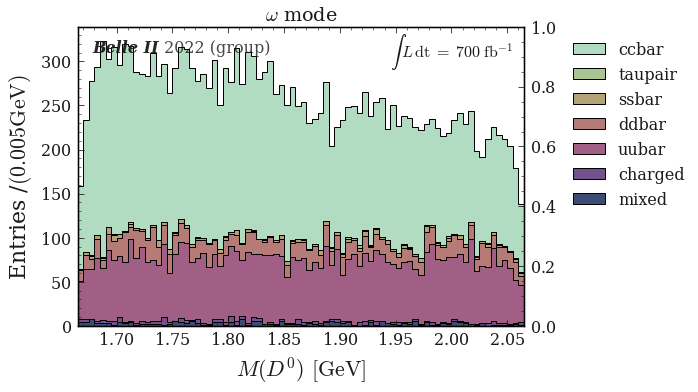

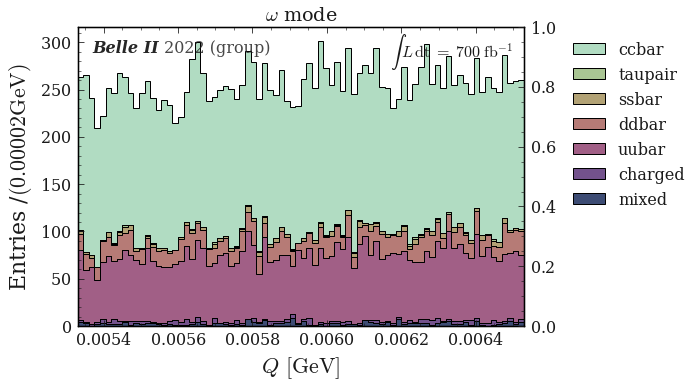

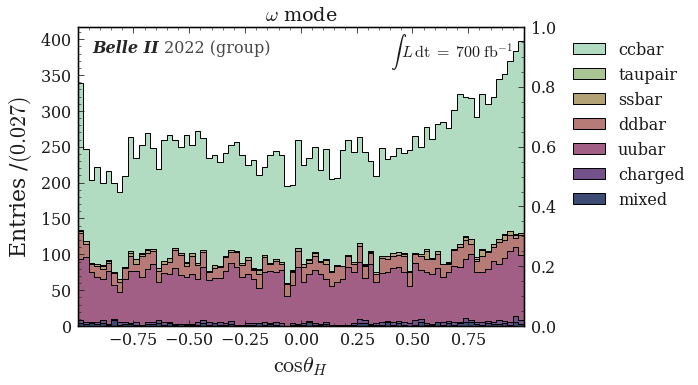

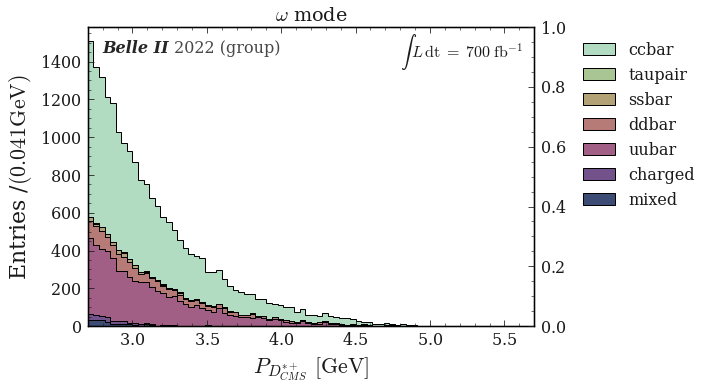

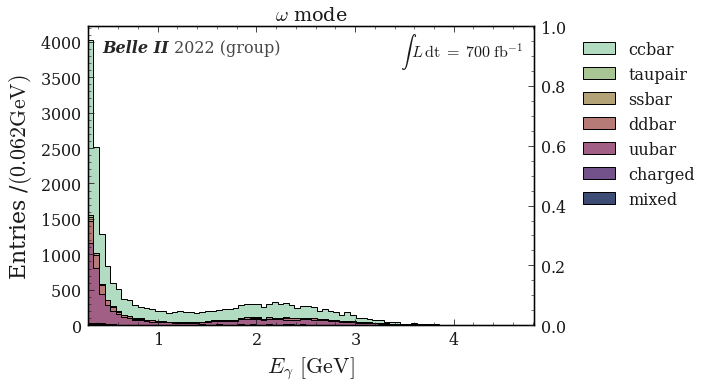

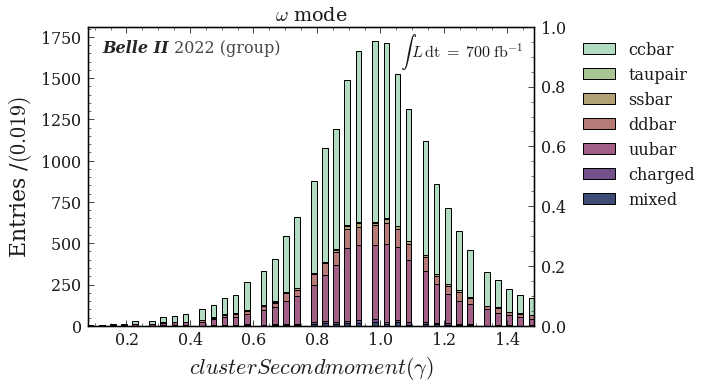

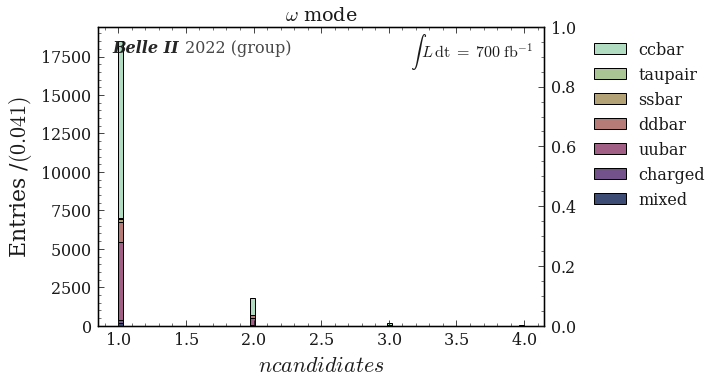

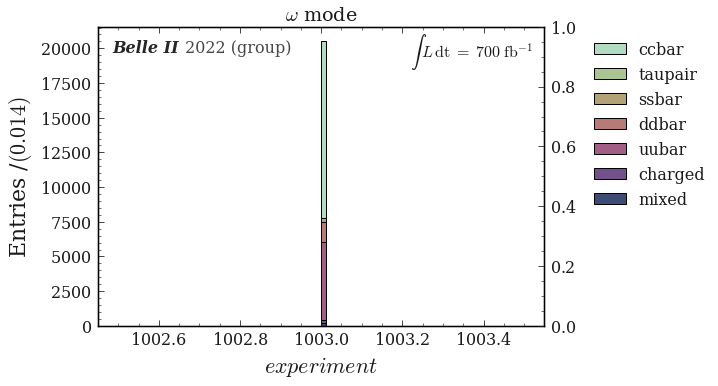

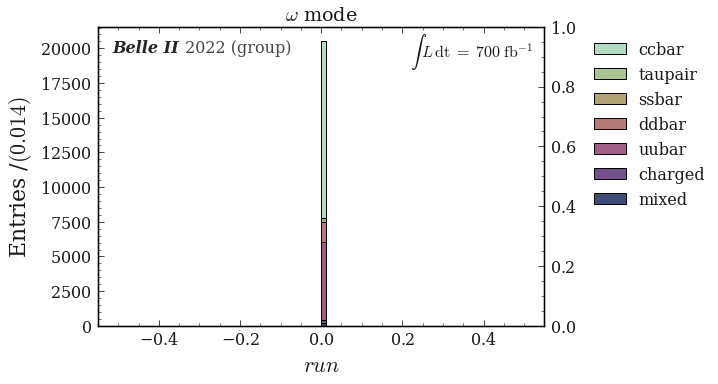

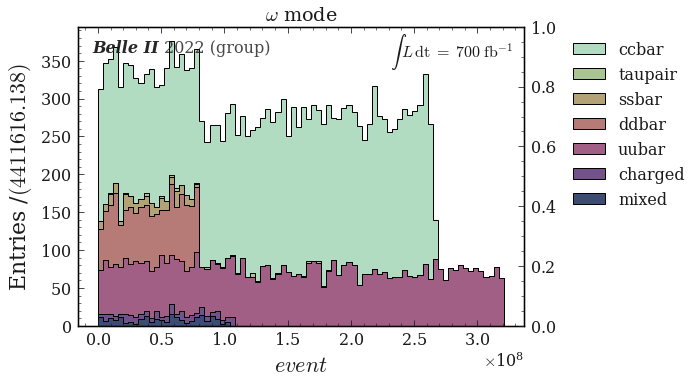

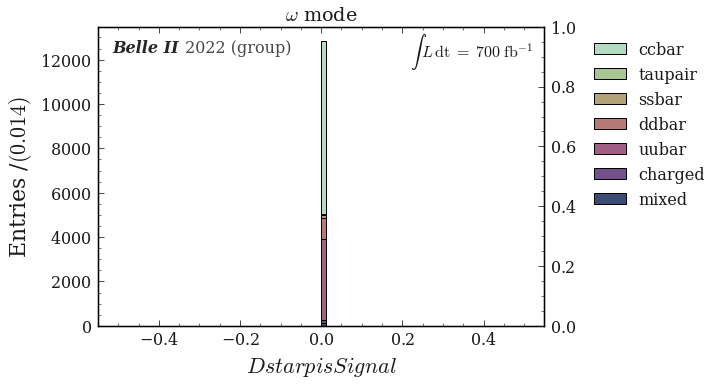

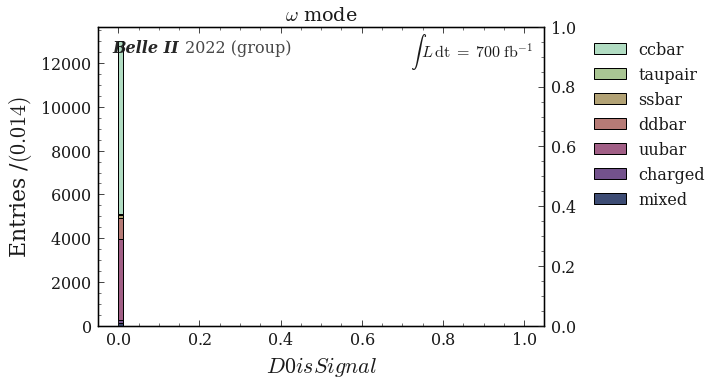

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

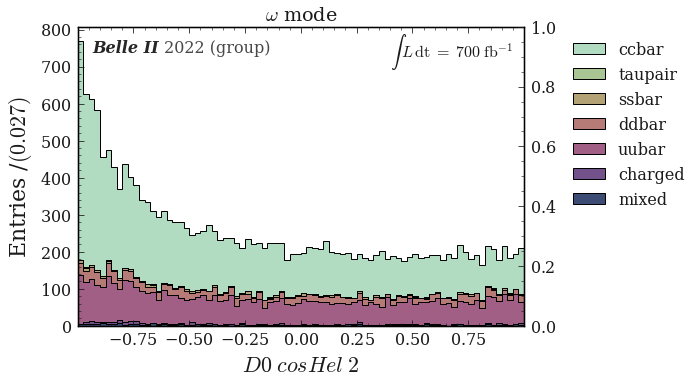

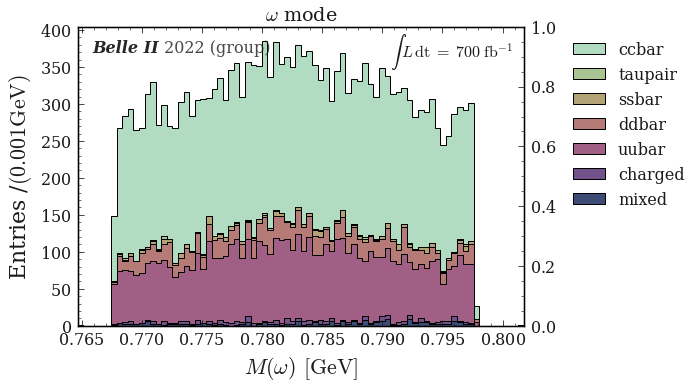

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [17]:
plot_title = r'$\omega$ mode'
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']

total_lumi="$700\; \mathrm{fb}^{-1}$"
draw_stack_no_signal(df=pd_omega,bins=80, vector='omega', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            


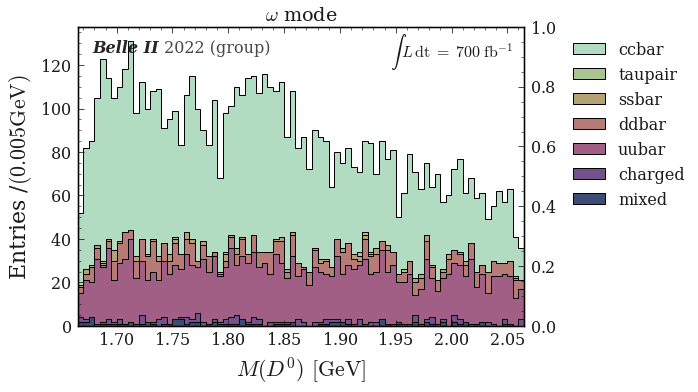

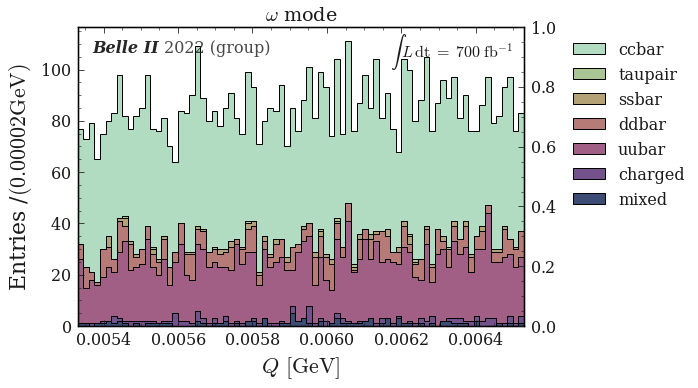

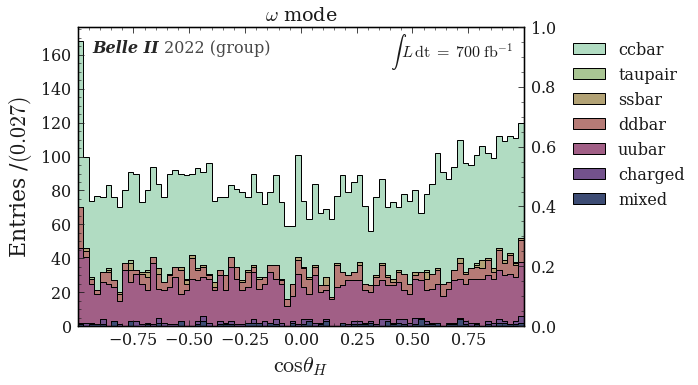

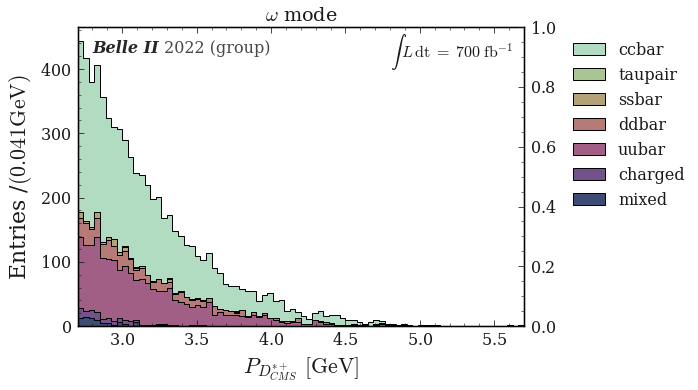

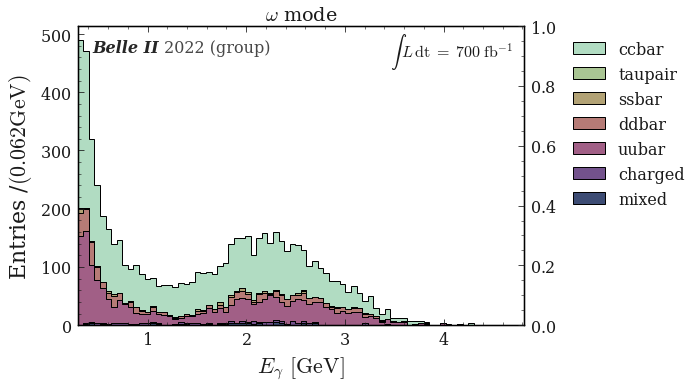

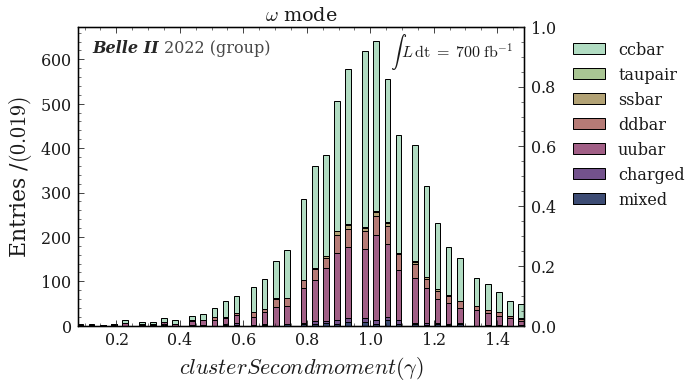

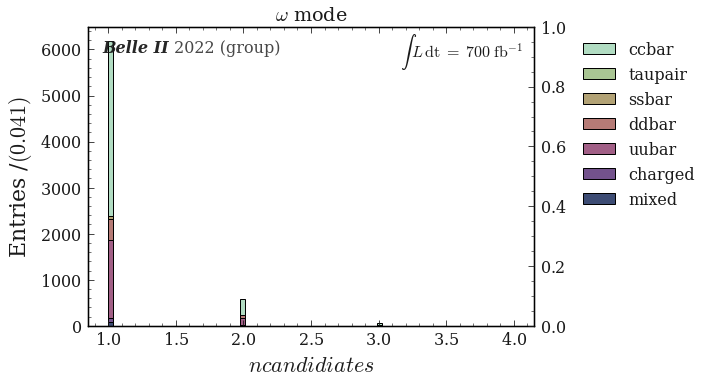

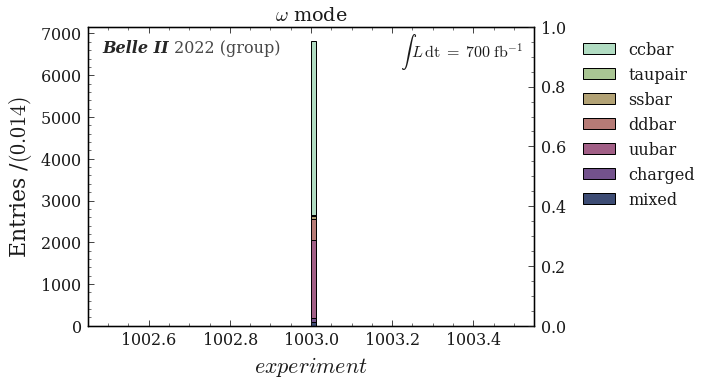

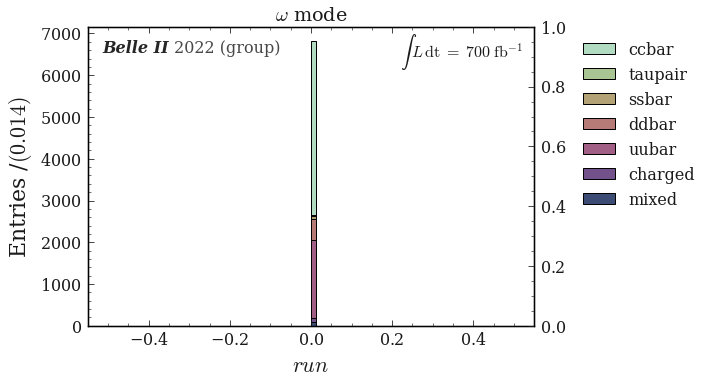

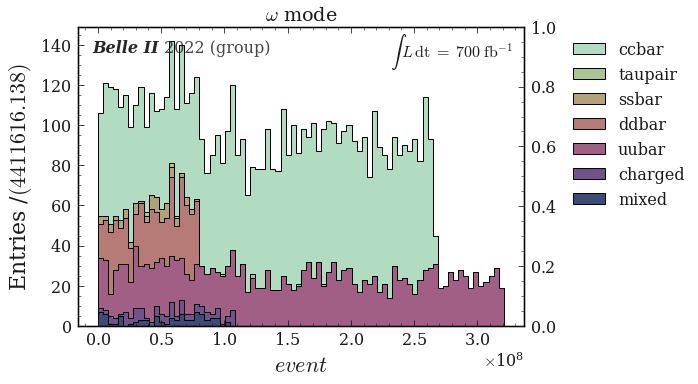

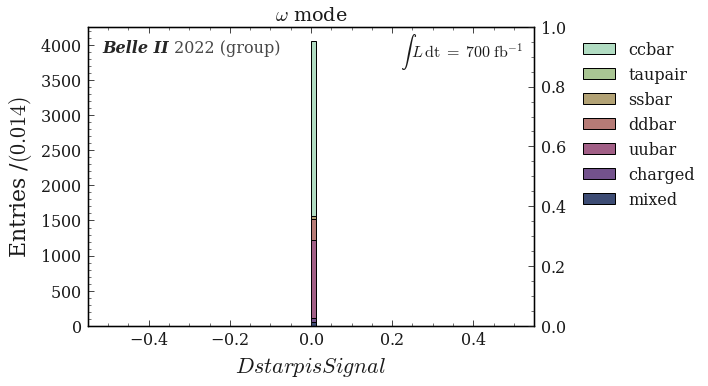

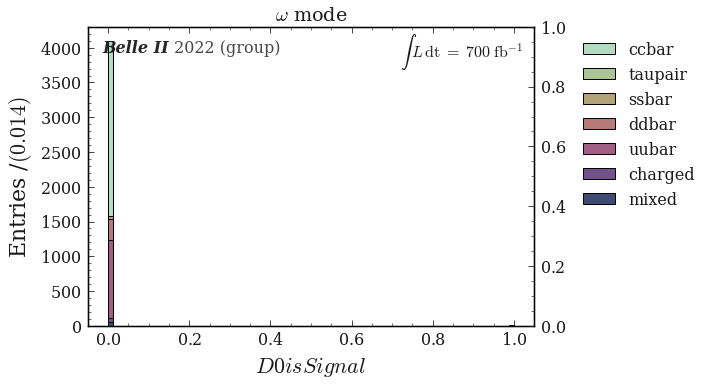

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 576x396 with 2 Axes>

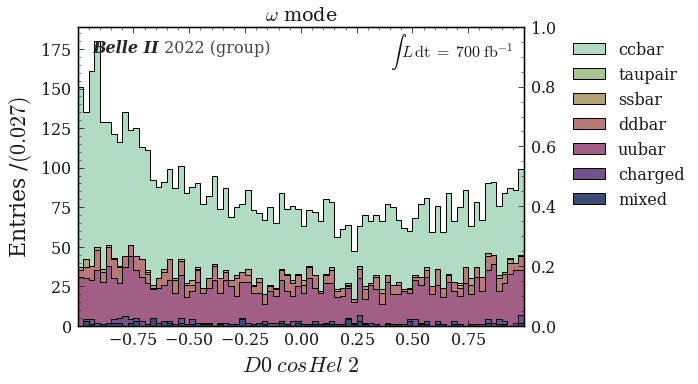

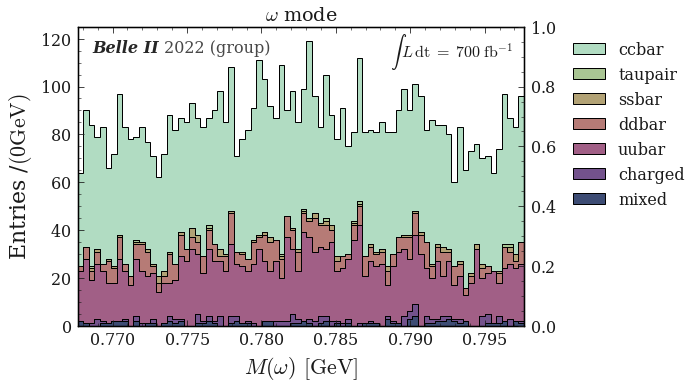

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [18]:
plot_title = r'$\omega$ mode'
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']

total_lumi="$700\; \mathrm{fb}^{-1}$"
draw_stack_no_signal(df=pd_omega[pd_omega['Pi0_Prob']<0.9],bins=80, vector='omega', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title,total_lumi=total_lumi)            
